In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

2024-12-06 18:24:08.696058: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 18:24:08.770937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 18:24:08.819969: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 18:24:08.833605: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 18:24:08.909343: I tensorflow/core/platform/cpu_feature_guar

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [68]:
x_train.shape

(60000, 28, 28)

In [69]:
x_train[0].shape

(28, 28)

In [70]:
y_train[0]

5

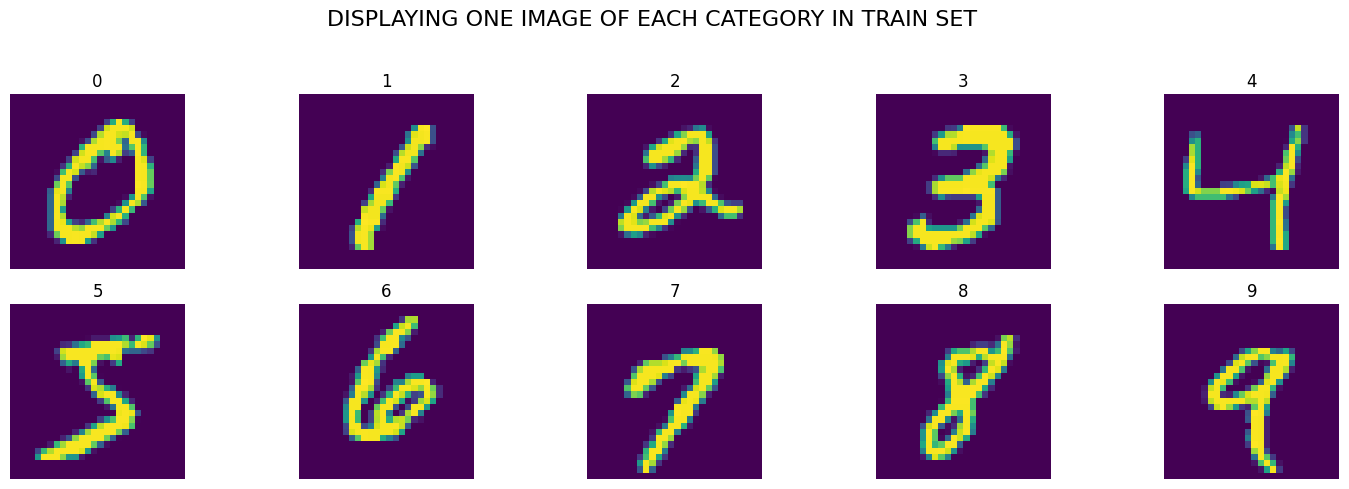

In [72]:
fig, ax= plt.subplots(nrows= 2, ncols= 5, figsize= (18,5))
plt.suptitle('displaying one image of each category in train set'.upper(),
             y= 1.05, fontsize= 16)
i= 0
for j in range(2):
  for k in range(5):
    ax[j,k].imshow(x_train[list(y_train).index(i)])
    ax[j,k].axis('off')
    ax[j,k].set_title(i)
    i+=1
plt.show()

## FCNN

In [3]:
fcnn1= Sequential([
    Flatten(Input=(28,28,1),name='Input_layer'),
    keras.layers.Rescaling(1./255),
    Dense(256,activation='relu',name='Hidden_layer_1'),
    Dropout(0.2),
    Dense(128,activation='relu',name='Hidden_Layer_2'),
    Dense(64,activation='relu',name='Hidden_layer_3'),
    Dense(10,activation='softmax',name='Output_layer')
])

I0000 00:00:1733489653.194502   64194 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733489653.259933   64194 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733489653.259991   64194 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733489653.267327   64194 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733489653.267376   64194 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [4]:
fcnn1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
his1=fcnn1.fit(x=x_train,y=y_train,batch_size=32,epochs=20,validation_split=0.1)

Epoch 1/20


I0000 00:00:1733489654.501059   64313 service.cc:146] XLA service 0x7ff2cc005790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733489654.501123   64313 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-12-06 18:24:14.522057: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-06 18:24:14.623873: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-12-06 18:24:15.650659: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_458', 48 bytes spill stores, 48 bytes spill loads

2024-12-06 18:24:15.707045: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory

 132/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5676 - loss: 1.3475

I0000 00:00:1733489657.537684   64313 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1641/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8571 - loss: 0.4669

2024-12-06 18:24:19.884855: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_458', 16 bytes spill stores, 16 bytes spill loads

2024-12-06 18:24:20.328056: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_458', 4 bytes spill stores, 4 bytes spill loads



1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8589 - loss: 0.4613 - val_accuracy: 0.9688 - val_loss: 0.1094
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9621 - loss: 0.1223 - val_accuracy: 0.9760 - val_loss: 0.0805
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9708 - loss: 0.0911 - val_accuracy: 0.9755 - val_loss: 0.0828
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9770 - loss: 0.0744 - val_accuracy: 0.9787 - val_loss: 0.0829
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0641 - val_accuracy: 0.9805 - val_loss: 0.0682
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9821 - loss: 0.0547 - val_accuracy: 0.9828 - val_loss: 0.0635
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9832 - loss: 0.0493 - val_accuracy: 0.9803 - val_loss: 0.0767
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9856 - loss: 0.0438 - val_accura

In [6]:
test_loss,test_acc=fcnn1.evaluate(x=x_test,y=y_test,batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.9783 - loss: 0.1001


In [ ]:
print('The accuracy of the model using FCNN is:',test_acc)
print('The loss of the model using FCNN is:',test_loss)

The accuracy of the model using FCNN is: 0.9807000160217285
The loss of the model using FCNN is: 0.9807000160217285


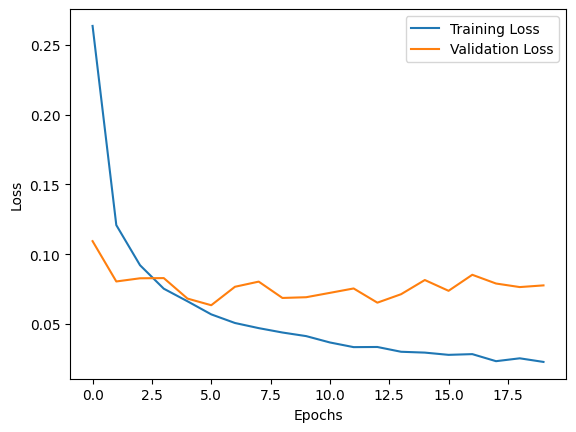

In [8]:
plt.plot(his1.history['loss'],label='Training Loss')
plt.plot(his1.history['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Observations
### Training loss is decreasing uniformly and stabalizing over the epochs
### Initially the validation loss decreases,later little varaiance seen in validation loss
### Since the variance is very low- we can eliminate the fact, that the model is over fitting. 

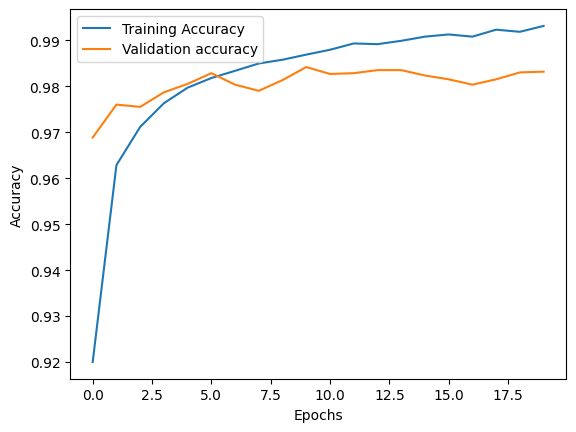

In [9]:
plt.plot(his1.history['accuracy'],label='Training Accuracy')
plt.plot(his1.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [20]:
y_pred1=fcnn1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step


In [21]:
y_pred1=np.argmax(y_pred1,axis=1)

In [22]:
cr=classification_report(y_test,y_pred1)

In [23]:
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



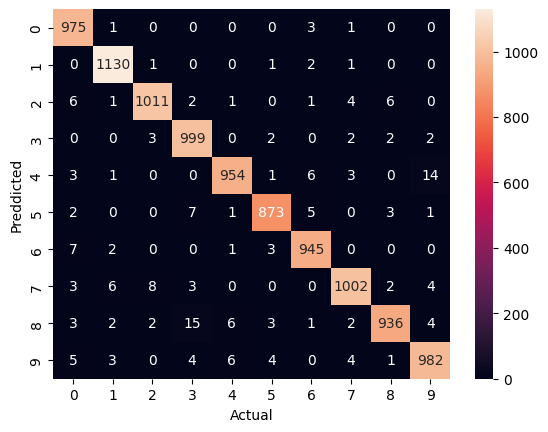

In [ ]:
cm=confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Actual')
plt.ylabel('Preddicted')
plt.title('Confusion Matrix')
plt.xticks(np.arange(10),np.arange(10))
plt.show()

## Observation  
### 1. The most misclassified digit is 8, which is confused with 3 and 9.
### 2. The least misclassified digit is 1, which is confused with 7.
### 3. The model is able to classify the digits with a high accuracy of 97.72%.
### 4. The model is able to classify the digits with a low loss of 0.1001.    

In [10]:
fcnn2= Sequential([
    Flatten(Input=(26,26,1)),
    keras.layers.Rescaling(1./255),
    Dense(256,activation='relu',name='Hidden_layer_1'),
    Dropout(0.2),
    Dense(128,activation='relu',name='Hidden_Layer_2'),
    Dense(64,activation='relu',name='Hidden_layer_3'),
    Dense(10,activation='softmax',name='Output_layer')
])
fcnn2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
fcnn2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_1 (Dense)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_3 (Dense)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
his2=fcnn2.fit(x=x_train,y=y_train,batch_size=32,epochs=50,validation_split=0.1)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8609 - loss: 0.4577 - val_accuracy: 0.9655 - val_loss: 0.1186
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9624 - loss: 0.1249 - val_accuracy: 0.9760 - val_loss: 0.0779
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9705 - loss: 0.0933 - val_accuracy: 0.9747 - val_loss: 0.0860
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9765 - loss: 0.0758 - val_accuracy: 0.9780 - val_loss: 0.0731
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9796 - loss: 0.0607 - val_accuracy: 0.9815 - val_loss: 0.0652
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9834 - loss: 0.0528 - val_accuracy: 0.9812 - val_loss: 0.0634
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9857 - loss: 0.0458 - val_accuracy: 0.9805 - val_loss: 0.0664
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9854 - loss: 0.0435 - 

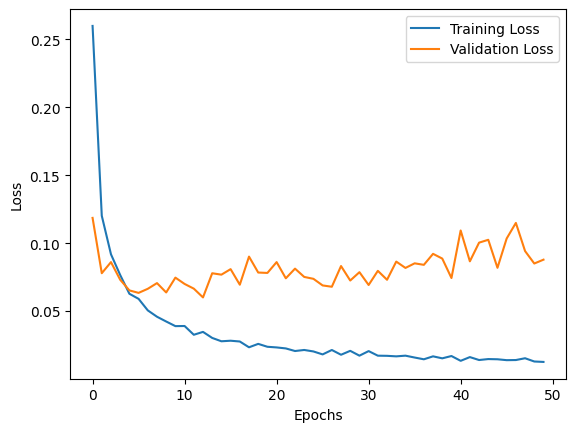

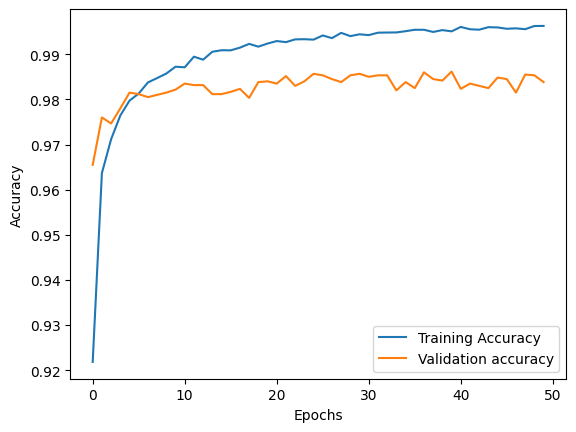

In [37]:
plt.plot(his2.history['loss'],label='Training Loss')
plt.plot(his2.history['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(his2.history['accuracy'],label='Training Accuracy')
plt.plot(his2.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()



In [27]:
y_pred2=fcnn2.predict(x_test)
y_pred2=np.argmax(y_pred2,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [31]:
fcnn2.evaluate(x=x_test,y=y_test,batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9804 - loss: 0.1139


[0.09108773618936539, 0.984000027179718]

In [29]:
cr=classification_report(y_test,y_pred2)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Axes: >

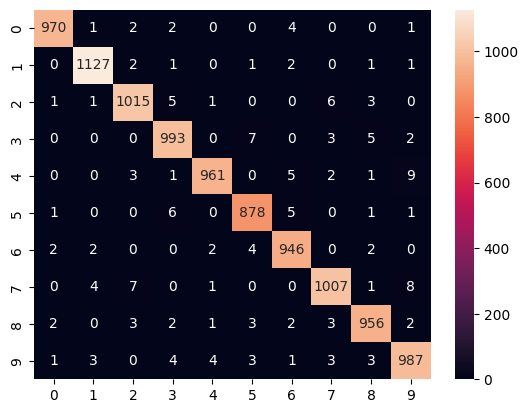

In [35]:
cm= confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True,fmt='d')

In [40]:
fcnn3= Sequential([
    Flatten(input_shape=(28,28)),
    keras.layers.Normalization(),
    Dense(256,activation='relu',name='Hidden_layer_1'),
    Dropout(0.2),
    Dense(128,activation='relu',name='Hidden_Layer_2'),
    Dense(64,activation='relu',name='Hidden_layer_3'),
    Dense(10,activation='softmax',name='Output_layer')
])
fcnn3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
fcnn3.summary()

/home/jac/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_2 (Normalization) │ (None, 784)            │         1,569 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_1 (Dense)          │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_3 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,331 (954.42 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 1,569 (6.13 KB)

In [41]:
his3=fcnn3.fit(x=x_train,y=y_train,batch_size=32,epochs=30,validation_split=0.1)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7506 - loss: 4.1400 - val_accuracy: 0.9373 - val_loss: 0.2273
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9105 - loss: 0.3227 - val_accuracy: 0.9603 - val_loss: 0.1503
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9383 - loss: 0.2198 - val_accuracy: 0.9628 - val_loss: 0.1369
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9456 - loss: 0.1889 - val_accuracy: 0.9700 - val_loss: 0.1117
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9560 - loss: 0.1532 - val_accuracy: 0.9723 - val_loss: 0.0964
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9592 - loss: 0.1405 - val_accuracy: 0.9712 - val_loss: 0.1107
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9596 - loss: 0.1393 - val_accuracy: 0.9715 - val_loss: 0.0968
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9652 - loss: 0.1213 - 

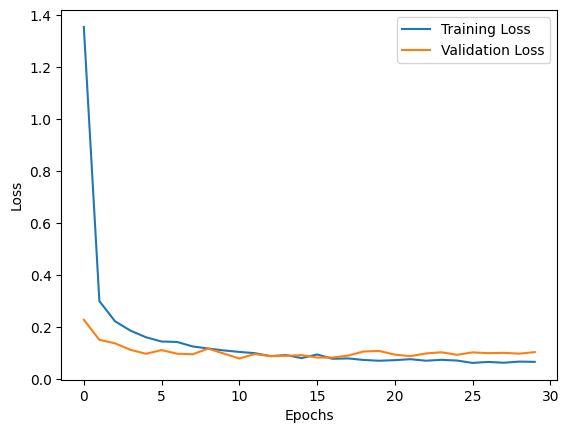

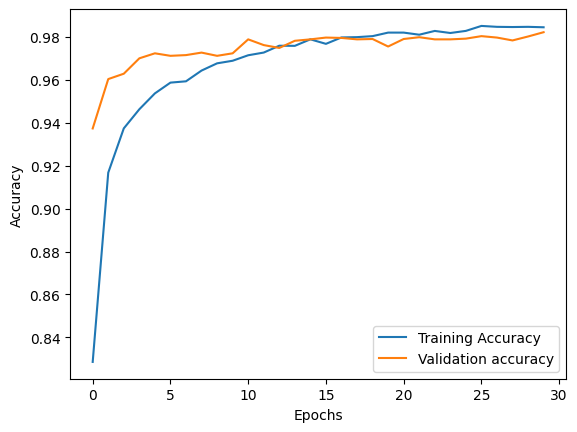

In [42]:
plt.plot(his3.history['loss'],label='Training Loss')
plt.plot(his3.history['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(his3.history['accuracy'],label='Training Accuracy')
plt.plot(his3.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()



In [45]:
y_pred3=fcnn2.predict(x_test)
y_pred3=np.argmax(y_pred3,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: >

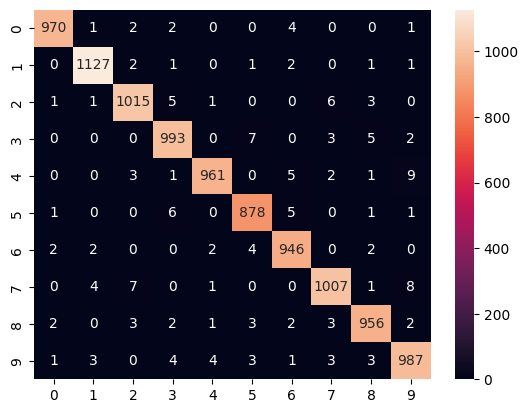

In [47]:
cm= confusion_matrix(y_test,y_pred3)
sns.heatmap(cm,annot=True,fmt='d')

## Using 1 CNN layer

In [50]:
cnn1= Sequential(
    [Input(shape=(28,28,1),name='Input_layer'),
     keras.layers.Normalization(),
     keras.layers.Conv2D(32,activation='relu',kernel_size=(5,5),strides=(1,1)),
     keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
     Flatten(),
     Dense(100,activation='relu',name='Hidden_layer'),
     keras.layers.Dropout(0.2),
     Dense(10,activation='softmax',name='output_layer')
    ]
)

In [51]:
cnn1.summary()
cnn1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 28, 28, 1)      │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer (Dense)            │ (None, 100)            │       460,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,745 (1.77 MB)

 Trainable params: 462,742 (1.77 MB)

 Non-trainable params: 3 (16.00 B)

In [53]:
his_cnn1=cnn1.fit(x=x_train,y=y_train,batch_size=32,epochs=50,validation_split=0.1)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9955 - loss: 0.0291 - val_accuracy: 0.9863 - val_loss: 0.2769
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9948 - loss: 0.0376 - val_accuracy: 0.9857 - val_loss: 0.3360
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9943 - loss: 0.0376 - val_accuracy: 0.9867 - val_loss: 0.2841
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9947 - loss: 0.0343 - val_accuracy: 0.9850 - val_loss: 0.3473
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9945 - loss: 0.0337 - val_accuracy: 0.9872 - val_loss: 0.2725
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9945 - loss: 0.0350 - val_accuracy: 0.9858 - val_loss: 0.3529
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9954 - loss: 0.0307 - val_accuracy: 0.9870 - val_loss: 0.3530
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9940 - loss: 0.0355 - 

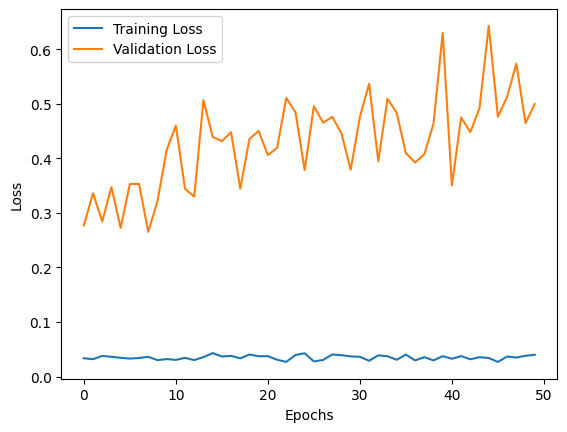

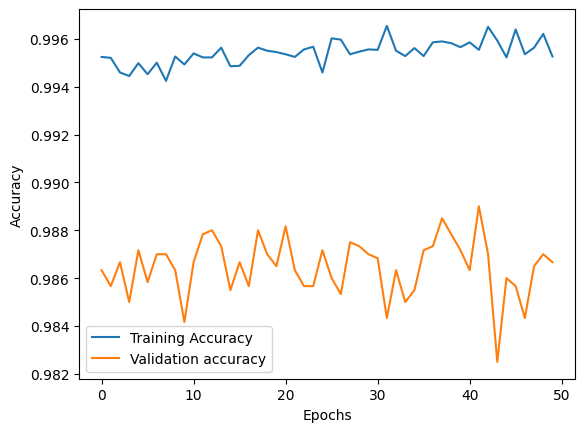

In [54]:
plt.plot(his_cnn1.history['loss'],label='Training Loss')
plt.plot(his_cnn1.history['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(his_cnn1.history['accuracy'],label='Training Accuracy')
plt.plot(his_cnn1.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()



In [55]:
cnn1.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9841 - loss: 0.5920


[0.5373395085334778, 0.9854000210762024]

In [56]:
y_pred_cnn=cnn1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [60]:
y_pred_cnn1=np.argmax(y_pred_cnn,axis=1)

In [61]:
cr=classification_report(y_test,y_pred_cnn1)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Axes: >

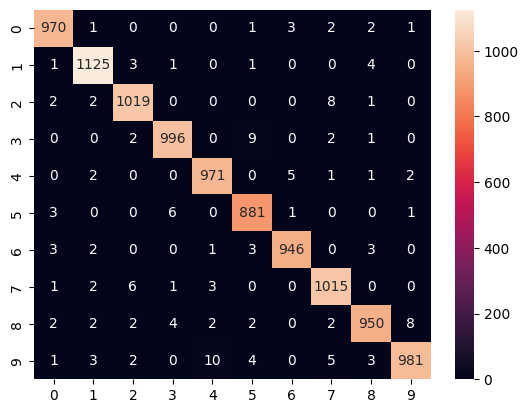

In [62]:
cm4=confusion_matrix(y_test,y_pred_cnn1)
sns.heatmap(cm4,annot=True,fmt='d')

## Using 2 Layers of Convolution layers

In [64]:
cnn2= Sequential(
    [Input(shape=(28,28,1),name='Input_layer'),
     keras.layers.Normalization(),
     keras.layers.Conv2D(32,activation='relu',kernel_size=(3,3),strides=(1,1)),
     keras.layers.Conv2D(32,activation='relu',kernel_size=(3,3),strides=(1,1)),
     keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
     Flatten(),
     Dense(100,activation='relu',name='Hidden_layer'),
     keras.layers.Dropout(0.2),
     Dense(10,activation='softmax',name='output_layer')
    ]
)

In [65]:
cnn2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (None, 28, 28, 1)      │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer (Dense)            │ (None, 100)            │       460,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471,481 (1.80 MB)

 Trainable params: 471,478 (1.80 MB)

 Non-trainable params: 3 (16.00 B)

In [66]:
his_cnn2=cnn2.fit(x=x_train,y=y_train,batch_size=32,epochs=50,validation_split=0.1)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8762 - loss: 0.9752 - val_accuracy: 0.9790 - val_loss: 0.0690
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9740 - loss: 0.0855 - val_accuracy: 0.9870 - val_loss: 0.0488
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9838 - loss: 0.0536 - val_accuracy: 0.9863 - val_loss: 0.0612
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9852 - loss: 0.0476 - val_accuracy: 0.9868 - val_loss: 0.0527
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9889 - loss: 0.0371 - val_accuracy: 0.9883 - val_loss: 0.0451
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9893 - val_loss: 0.0560
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9910 - loss: 0.0298 - val_accuracy: 0.9890 - val_loss: 0.0487
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9924 - loss: 0.0253 - 

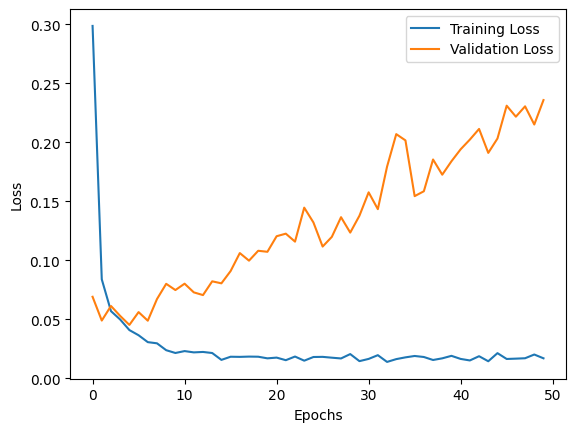

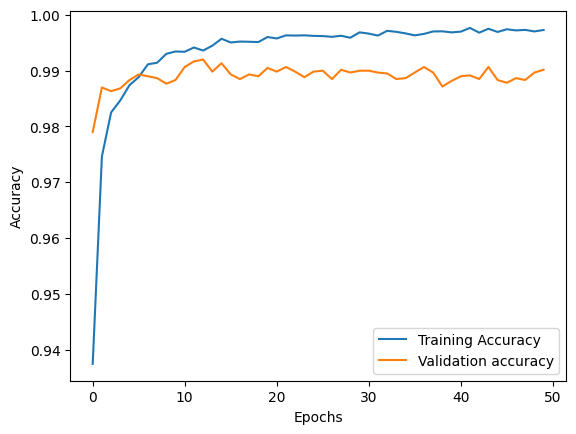

In [67]:
plt.plot(his_cnn2.history['loss'],label='Training Loss')
plt.plot(his_cnn2.history['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(his_cnn2.history['accuracy'],label='Training Accuracy')
plt.plot(his_cnn2.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()



## Observation
### 1.The CNN models had the training loss deccrease and stabalize over the epochs, but the variance was high and validation loss was increasing over the epochs, which clearly shows that our model is overfitting. 
### 2. Pausible causes of this could be: Data leakage and selection bias of the later model
